In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
X,y=make_classification(
    n_features=10,
    n_samples=1000,
    n_informative=4,
    n_repeated=0,
    n_redundant=6,
    n_classes=2,
    random_state=42
)



In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [7]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [9]:
from sklearn.metrics import classification_report


In [13]:
y_pred=model.predict(X_test)
report=classification_report(y_test,y_pred)

In [17]:
print(report)

              precision    recall  f1-score   support

           0       0.66      0.69      0.67       122
           1       0.69      0.66      0.68       128

    accuracy                           0.68       250
   macro avg       0.68      0.68      0.68       250
weighted avg       0.68      0.68      0.68       250



In [19]:
probabilities=model.predict_proba(X_test)[:,1]
y_pred=(probabilities>0.4).astype(int)

In [21]:
from sklearn.metrics import roc_curve

In [125]:
fpr_log,tpr_log,threshold=roc_curve(y_test,probabilities)

In [27]:
fpr[:5],tpr[:5],threshold[:5]

(array([0.        , 0.        , 0.        , 0.00819672, 0.00819672]),
 array([0.       , 0.0078125, 0.265625 , 0.265625 , 0.2890625]),
 array([       inf, 0.97928246, 0.80890214, 0.80840719, 0.80207033]))

In [29]:
tpr

array([0.       , 0.0078125, 0.265625 , 0.265625 , 0.2890625, 0.2890625,
       0.296875 , 0.296875 , 0.34375  , 0.34375  , 0.3515625, 0.3515625,
       0.375    , 0.375    , 0.3984375, 0.3984375, 0.4296875, 0.4296875,
       0.4375   , 0.4375   , 0.4609375, 0.4609375, 0.46875  , 0.46875  ,
       0.4765625, 0.4765625, 0.484375 , 0.484375 , 0.4921875, 0.4921875,
       0.5078125, 0.5078125, 0.515625 , 0.515625 , 0.5390625, 0.5390625,
       0.5546875, 0.5546875, 0.5859375, 0.5859375, 0.625    , 0.625    ,
       0.640625 , 0.640625 , 0.6484375, 0.6484375, 0.65625  , 0.65625  ,
       0.71875  , 0.71875  , 0.75     , 0.75     , 0.7578125, 0.7578125,
       0.765625 , 0.765625 , 0.7734375, 0.7734375, 0.7890625, 0.7890625,
       0.796875 , 0.796875 , 0.84375  , 0.84375  , 0.8515625, 0.8515625,
       0.859375 , 0.859375 , 0.8671875, 0.8671875, 0.875    , 0.875    ,
       0.8828125, 0.8828125, 0.890625 , 0.890625 , 0.90625  , 0.90625  ,
       0.9140625, 0.9140625, 0.921875 , 0.921875 , 

In [35]:
##### i want recall should be 90%
import numpy as np

In [87]:
desired_recall=0.8
np.argmin(abs(tpr-desired_recall))  # will give u the minimum value index

60

In [105]:
threshold[60] , fpr[60]

(0.4236689405793843, 0.4180327868852459)

In [99]:
from sklearn.metrics import auc

In [101]:
area=auc(fpr,tpr)

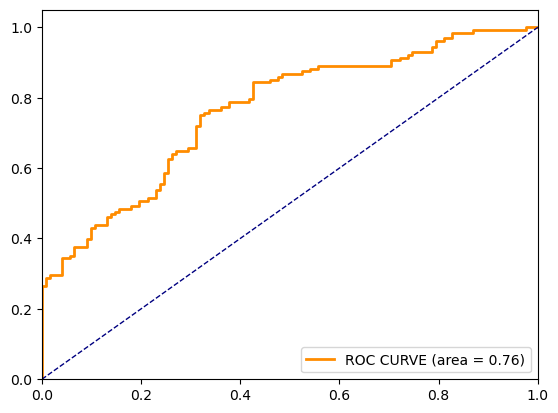

In [103]:
plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC CURVE (area = %0.2f)' % area)
plt.plot([0,1],[0,1],color="navy",lw=1,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc="lower right")

In [107]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [109]:
model=XGBClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
report=classification_report(y_test,y_pred)

In [111]:
print(report)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       122
           1       0.93      0.89      0.91       128

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



In [115]:
fpr , tpr , threshold = roc_curve(y_test,y_pred)

In [117]:
fpr[:5] , tpr[:5] ,threshold[:5]

(array([0.        , 0.06557377, 1.        ]),
 array([0.      , 0.890625, 1.      ]),
 array([inf,  1.,  0.]))

In [123]:
auc(fpr,tpr)

0.9125256147540984

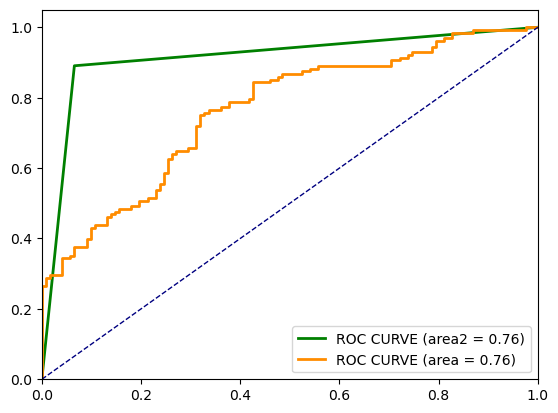

In [131]:
plt.plot(fpr,tpr,color='green',lw=2,label='ROC CURVE (area2 = %0.2f)' % area)
plt.plot(fpr_log,tpr_log,color='darkorange',lw=2,label='ROC CURVE (area = %0.2f)' % area)
plt.plot([0,1],[0,1],color="navy",lw=1,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc="lower right")